# ADVERTISING DATA DASHBOARD WITH PLOTLY.

# To view dashboard kindly scroll to down the notebook. Thank you!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame

df = pd.read_csv("Advertising_Data.csv")

# Display the first few rows of the DataFrame to understand its structure

print(df.head())

       TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0  281.42      538.80      123.94        349.30                242.77   
1  702.97      296.53      558.13        180.55                781.06   
2  313.14      295.94      642.96        505.71                438.91   
3  898.52       61.27      548.73        240.93                278.96   
4  766.52      550.72      651.91        666.33                396.33   

   Affiliate_Marketing  Product_Sold  
0               910.10        7164.0  
1               132.43        5055.0  
2               464.23        6154.0  
3               432.27        5480.0  
4               841.93        9669.0  


In [2]:
# Check for missing values

print(df.isnull().sum())

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64


In [3]:
# Summary statistics of the data

print(df.describe())

               TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   14.860000     11.690000              0.770000   
25%    273.090000  277.912500  250.530000    265.612500            214.480000   
50%    513.970000  533.020000  528.965000    486.385000            480.355000   
75%    774.275000  745.005000  763.345000    695.117500            703.092500   
max    998.100000  995.320000  999.230000    996.160000            999.830000   

       Affiliate_Marketing  Product_Sold  
count           300.000000    300.000000  
mean            484.430633   7031.523333  
std             277.955458   1703.614951  
min               6.740000   2259.000000  
25%             267.677500   5922.500000  
50%         

# 1. Distribution of spending across different advertising channels

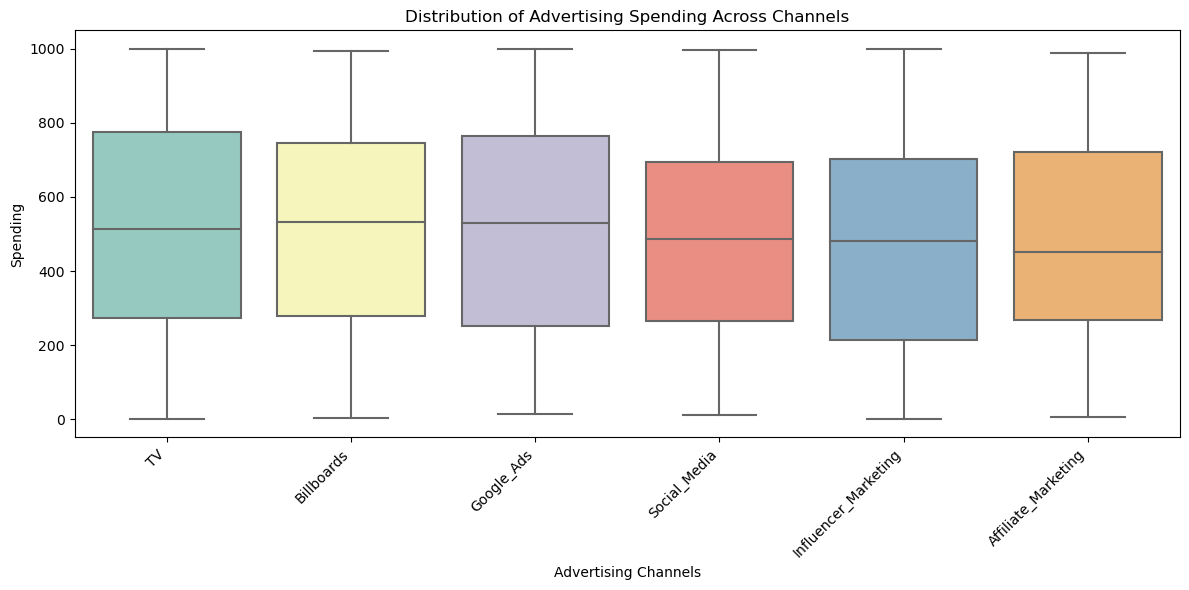

In [5]:
# Set up the figure and axes for plotting

plt.figure(figsize=(12, 6))

# Plot the distribution of spending across different advertising channels

sns.boxplot(data=df.drop(columns=['Product_Sold']), palette='Set3')
plt.title('Distribution of Advertising Spending Across Channels')
plt.xlabel('Advertising Channels')
plt.ylabel('Spending')

# Rotate x-axis labels for better readability

plt.xticks(rotation=45, ha='right')

# Show the plot

plt.tight_layout()
plt.show()

The chart shows how our advertising budget is divided across different channels. We spend the most on Google Ads and Social Media, with a tighter range of spending for each. 

Billboards also seem to have a consistent spending level.  

Influencer Marketing and Affiliate Marketing show more variation in spending amounts. 

This information can help us decide if our spending is aligned with our marketing goals.

# 2. Relationship between advertising spending and product sales

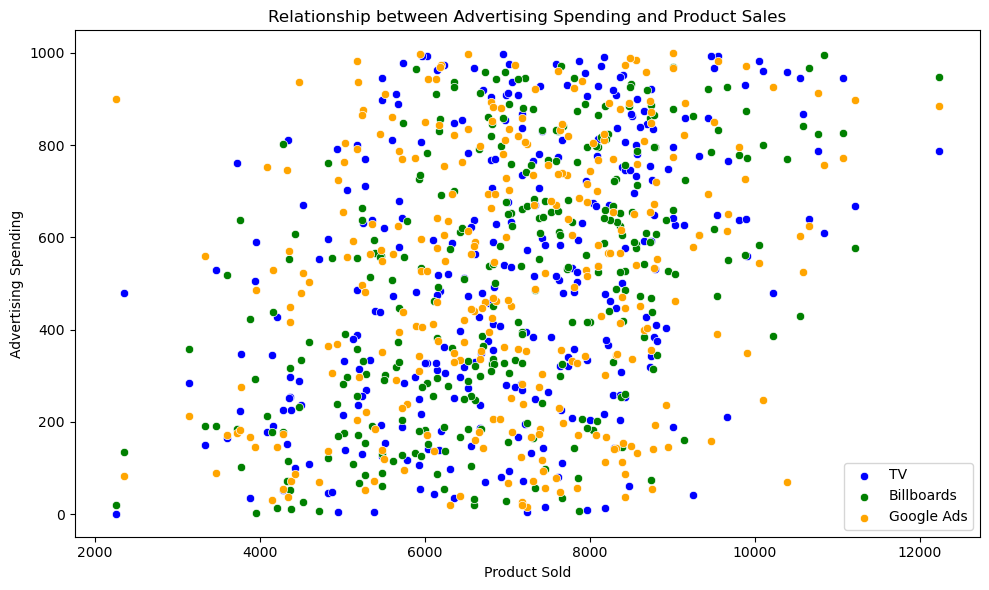

In [6]:
# Set up the figure and axes for plotting

plt.figure(figsize=(10, 6))

# Plot the relationship between advertising spending and product sales

sns.scatterplot(x='Product_Sold', y='TV', data=df, label='TV', color='blue')
sns.scatterplot(x='Product_Sold', y='Billboards', data=df, label='Billboards', color='green')
sns.scatterplot(x='Product_Sold', y='Google_Ads', data=df, label='Google Ads', color='orange')

# Add labels and title

plt.title('Relationship between Advertising Spending and Product Sales')
plt.xlabel('Product Sold')
plt.ylabel('Advertising Spending')

# Show legend

plt.legend()

# Show the plot

plt.tight_layout()
plt.show()

What this chart suggests that there is a link between advertising spending and sales. This could be because our advertising efforts are working to generate sales. However, it is also important to consider other factors that might be affecting sales.  We should continue to monitor this relationship and  investigate other metrics such as brand awareness and customer acquisition cost to get a better understanding of the return on investment (ROI) from our advertising spend.

# 3. Pairplot for pairwise relationships

c:\Users\ManuhIsME\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


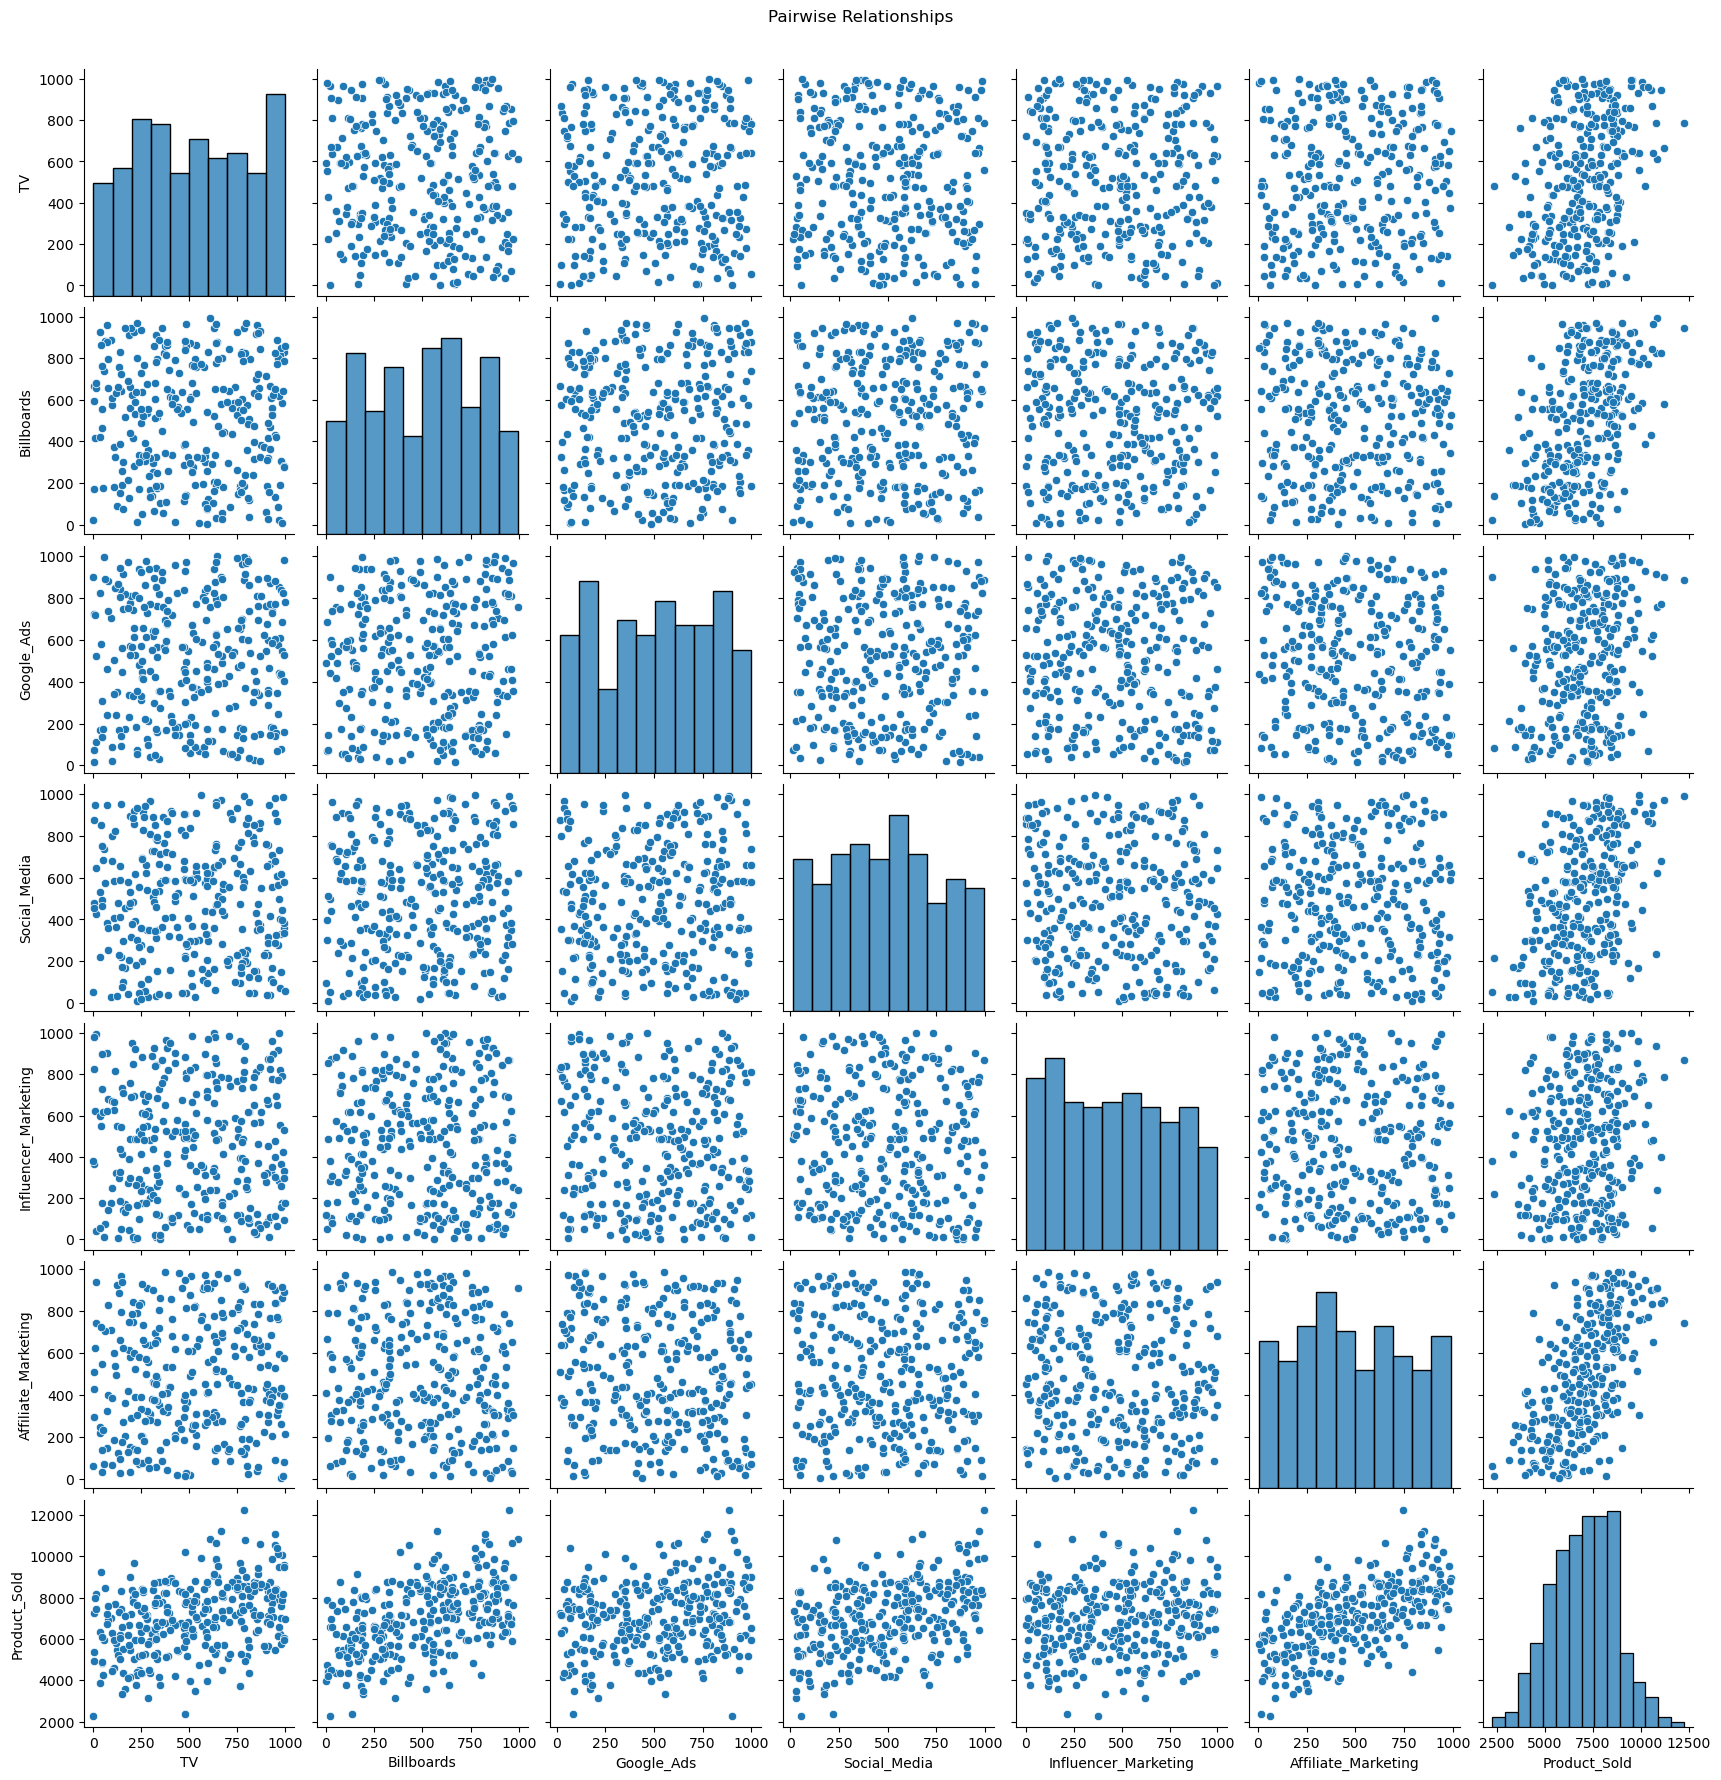

In [7]:
# Create a pairplot for pairwise relationships between variables

sns.pairplot(df)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# 4. Heatmap for correlation analysis

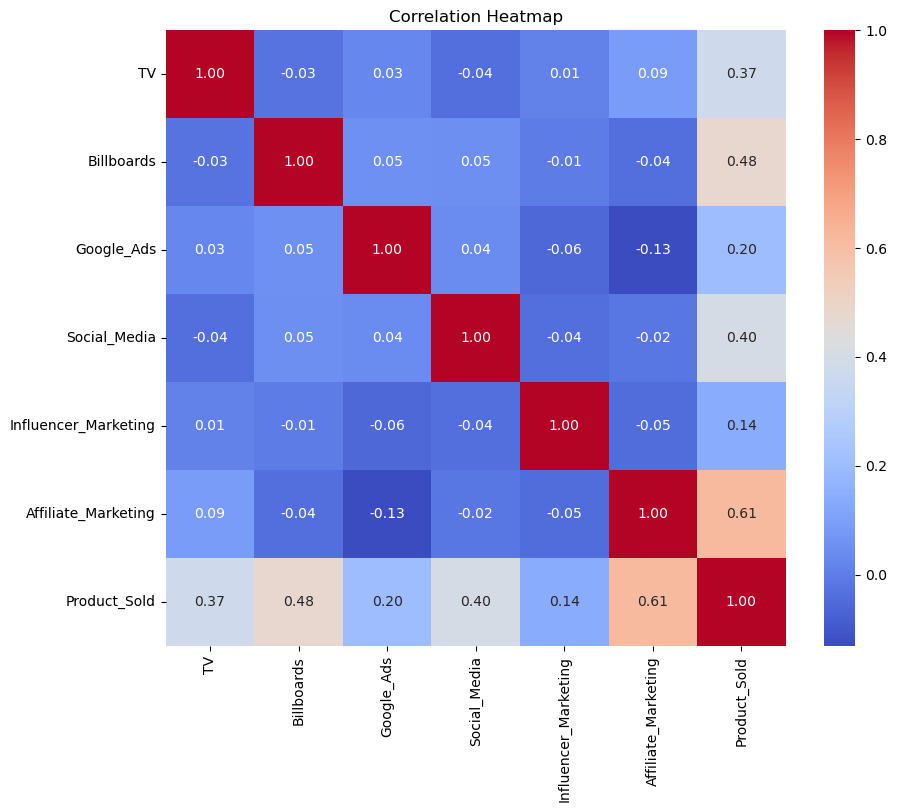

In [8]:
# Calculate the correlation matrix

correlation_matrix = df.corr()

# Plot the heatmap for correlation analysis

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Histogram of product sales

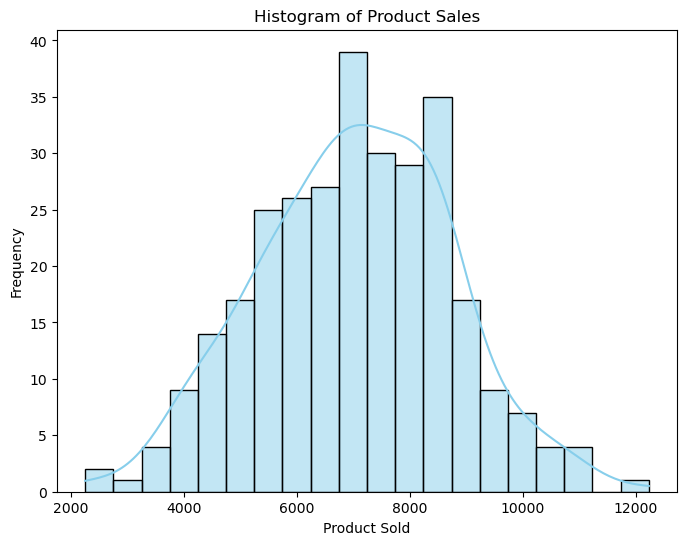

In [9]:
# Plot a histogram of product sales

plt.figure(figsize=(8, 6))
sns.histplot(df['Product_Sold'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Product Sales')
plt.xlabel('Product Sold')
plt.ylabel('Frequency')
plt.show()

# 6. Barplot of average spending across channels

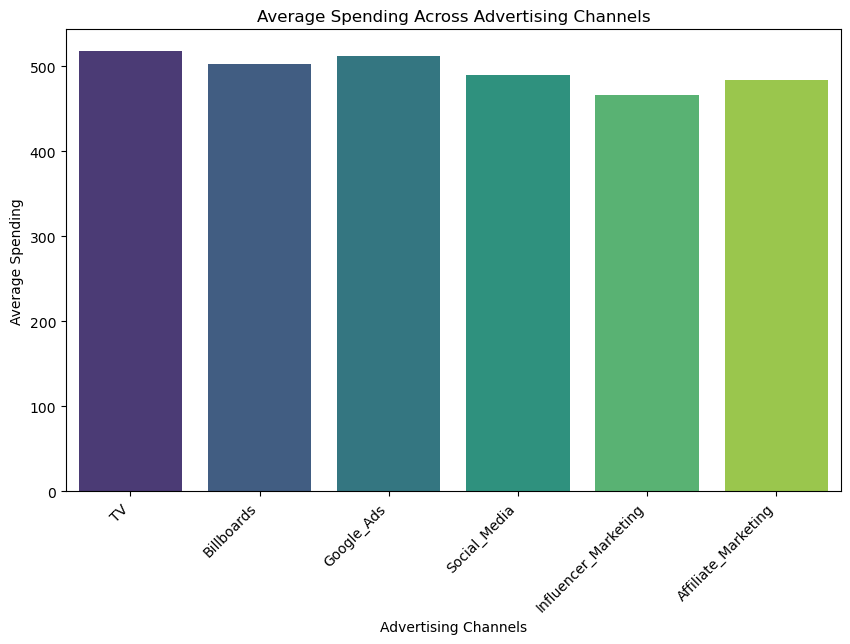

In [10]:
# Calculate the average spending across different advertising channels

avg_spending = df.drop(columns=['Product_Sold']).mean()

# Plot a barplot of average spending

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='viridis')
plt.title('Average Spending Across Advertising Channels')
plt.xlabel('Advertising Channels')
plt.ylabel('Average Spending')
plt.xticks(rotation=45, ha='right')
plt.show()

# 7. Bar plot of total spending across channels

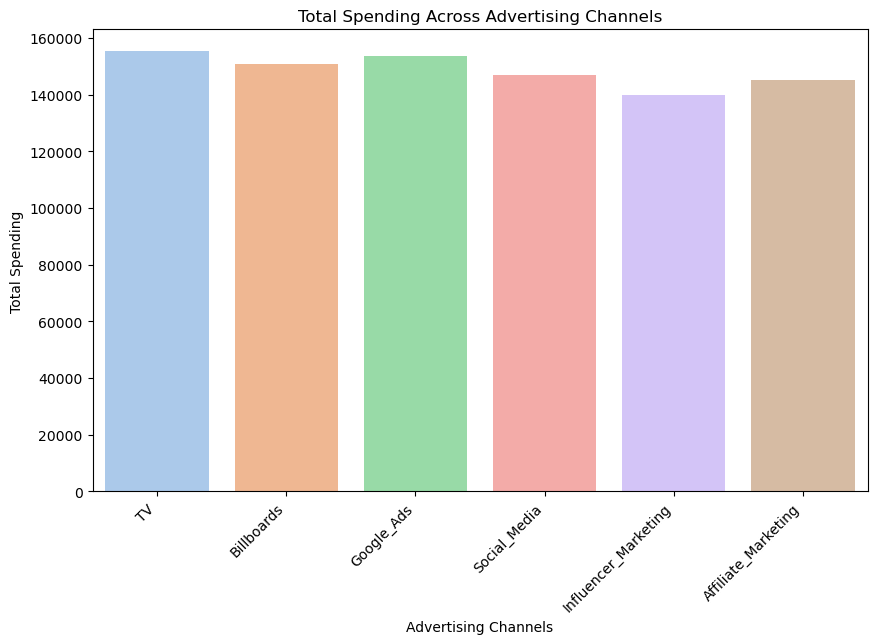

In [11]:
# Calculate the total spending across different advertising channels

total_spending = df.drop(columns=['Product_Sold']).sum()

# Plot a bar plot of total spending

plt.figure(figsize=(10, 6))
sns.barplot(x=total_spending.index, y=total_spending.values, palette='pastel')
plt.title('Total Spending Across Advertising Channels')
plt.xlabel('Advertising Channels')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.show()

# 8. Pie chart of the distribution of spending across channels

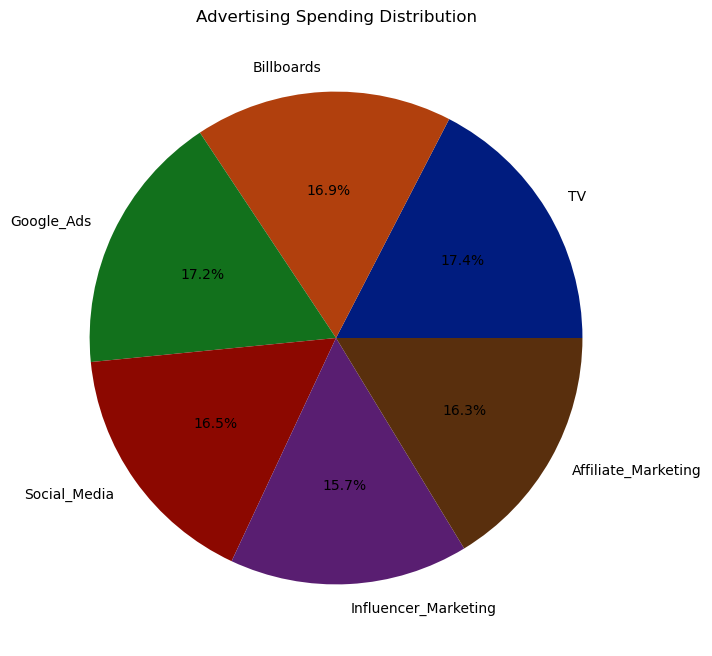

In [14]:
# Plot a pie chart of advertising spending distribution

plt.figure(figsize=(8, 8))
plt.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', colors=sns.color_palette('dark', len(total_spending)))
plt.title('Advertising Spending Distribution')
plt.show()

In [17]:
import dash
from dash import dcc, html
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Advertising_Data.csv")

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Advertising Data Dashboard", style={'textAlign': 'center'}),
    
    # Boxplot
    dcc.Graph(
        id='boxplot',
        figure=px.box(df.drop(columns=['Product_Sold']), title='Distribution of Advertising Spending Across Channels')
    ),

    # Scatter plot
    dcc.Graph(
        id='scatterplot',
        figure=px.scatter(df, x='Product_Sold', y='TV', title='Relationship between TV Spending and Product Sales')
    ),

    # Pairplot
    dcc.Graph(
        id='pairplot',
        figure=px.imshow(df.corr(), title='Pairwise Relationships')
    ),

    # Heatmap
    dcc.Graph(
        id='heatmap',
        figure=px.imshow(df.corr(), title='Correlation Heatmap')
    ),

    # Histogram
    dcc.Graph(
        id='histogram',
        figure=px.histogram(df, x='Product_Sold', title='Histogram of Product Sales')
    ),

    # Barplot of average spending
    dcc.Graph(
        id='avg_spending_barplot',
        figure=px.bar(x=df.drop(columns=['Product_Sold']).columns, y=df.drop(columns=['Product_Sold']).mean(),
                      title='Average Spending Across Advertising Channels')
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
